# Phosphoproteomics scoring

## Setup

In [ ]:
!pip install git+https://github.com/sky1ove/katlas.git -Uq

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from katlas.core import *
from katlas.plot import *
import seaborn as sns
from tqdm import tqdm
import numpy as np

tqdm.pandas()

In [ ]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

## Combine phosphoplus and ochoa

There are three datasets of phosphorylation sites:
- CPTAC pan cancer
- ochoa et al. paper
- phosphoplus

In [ ]:
ochoa = Data.get_ochoa_site()
# cptac = Data.get_cptac_ensembl_site()
pplus = Data.get_pplus_human_site()

In [ ]:
pplus['site_seq'] = pplus.site_seq.str.upper()

pplus['gene'] =pplus['gene'].fillna(pplus.uniprot)

pplus['gene_site'] = pplus.gene+"_"+pplus.site

pplus = pplus[pplus.LT_LIT.notna()]

pplus = pplus[['gene','gene_site','site_seq']]

In [ ]:
ochoa['gene'] = ochoa.gene_site.str.split('_').str[0]

ochoa = ochoa[['gene','gene_site','site_seq']]

In [ ]:
pplus['source'] = 'phosphoplus'

ochoa['source']='ochoa'

In [ ]:
pplus.shape

(15113, 4)

In [ ]:
ochoa.shape

(112281, 4)

In [ ]:
comb = pd.concat([pplus,ochoa]).reset_index(drop=True)

In [ ]:
idx = comb.iloc[:,:3].drop_duplicates().index

In [ ]:
comb = comb.loc[idx]

In [ ]:
comb.source.value_counts()

ochoa          108885
phosphoplus     15026
Name: source, dtype: int64

In [ ]:
comb=comb[comb.site_seq.str[7].isin(['S','T','Y'])]

In [ ]:
comb.source.value_counts()

ochoa          108885
phosphoplus     15005
Name: source, dtype: int64

In [ ]:
# def plot_count(cnt,tick_spacing = None,palette='tab20'):

#     c = sns.color_palette(palette)
#     ax = cnt.plot.barh(color = c)

#     for index, value in enumerate(cnt):
#         plt.text(value, index, str(value),fontsize=10,rotation=-90, va='center')
#         # Set x-ticks at regular intervals
#     if tick_spacing is not None:
#         ax.xaxis.set_major_locator(MultipleLocator(tick_spacing))


### Get unique site

In [ ]:
unique = comb.groupby('site_seq').agg(
    {'gene_site': lambda r: '|'.join(r.unique()), 
     'gene': lambda r: '|'.join(r.unique())} )

unique['num_site'] = unique['gene_site'].str.split('|').apply(len)

unique = unique.reset_index()

unique['acceptor'] = unique['site_seq'].str[7]

In [ ]:
unique

,site_seq,gene_site,gene,num_site,acceptor
0,AAAAAAASGGAGSDN,PBX1_S136,PBX1,1,S
1,AAAAAAASGGGVSPD,PBX2_S146,PBX2,1,S
2,AAAAAAASGVTTGKP,CLASR_S349,CLASR,1,S
3,AAAAAAASQQGSAKN,TBL1R_S119,TBL1R,1,S
4,AAAAAAASSPVGVGQ,SOX3_S249,SOX3,1,S
...,...,...,...,...,...
116882,______MYHSLSETR,TBCD5_Y2,TBCD5,1,Y
116883,______MYPESTTGS,KCAB2_Y2,KCAB2,1,Y
116884,______MYTAIPQSG,CAPG_Y2,CAPG,1,Y
116885,_______SGRGKGGK,H4C1_S1,H4C1,1,S


In [ ]:
unique.sort_values('num_site',ascending=False).head()

,site_seq,gene_site,gene,num_site,acceptor
103690,TLQHVPDYRQNVYIP,PCDGC_Y891|PCDGK_Y893|PCDGG_Y882|PCDGM_Y903|PCDGL_Y897|PCDGJ_Y888|PCDGI_Y889|PCDGH_Y882|PCDGF_Y888|PCDGE_Y890|PCDGD_Y886|PCDG9_Y891|PCDG8_Y891|PCDG7_Y891|PCDG6_Y891|PCDG5_Y890|PCDG3_Y891|PCDG2_Y891|PCDGB_Y894|PCDGA_Y895|PCDG1_Y890,PCDGC|PCDGK|PCDGG|PCDGM|PCDGL|PCDGJ|PCDGI|PCDGH|PCDGF|PCDGE|PCDGD|PCDG9|PCDG8|PCDG7|PCDG6|PCDG5|PCDG3|PCDG2|PCDGB|PCDGA|PCDG1,21,Y
103880,TMGLSARYGPQFTLQ,PCDGC_Y879|PCDGK_Y881|PCDGG_Y870|PCDGM_Y891|PCDGL_Y885|PCDGJ_Y876|PCDGI_Y877|PCDGH_Y870|PCDGF_Y876|PCDGE_Y878|PCDGD_Y874|PCDG9_Y879|PCDG8_Y879|PCDG7_Y879|PCDG6_Y879|PCDG5_Y878|PCDG3_Y879|PCDG2_Y879|PCDGB_Y882|PCDGA_Y883|PCDG1_Y878,PCDGC|PCDGK|PCDGG|PCDGM|PCDGL|PCDGJ|PCDGI|PCDGH|PCDGF|PCDGE|PCDGD|PCDG9|PCDG8|PCDG7|PCDG6|PCDG5|PCDG3|PCDG2|PCDGB|PCDGA|PCDG1,21,Y
64327,PDYRQNVYIPGSNAT,PCDGC_Y896|PCDGK_Y898|PCDGG_Y887|PCDGM_Y908|PCDGL_Y902|PCDGJ_Y893|PCDGI_Y894|PCDGH_Y887|PCDGF_Y893|PCDGE_Y895|PCDGD_Y891|PCDG9_Y896|PCDG8_Y896|PCDG7_Y896|PCDG6_Y896|PCDG5_Y895|PCDG3_Y896|PCDG2_Y896|PCDGB_Y899|PCDGA_Y900|PCDG1_Y895,PCDGC|PCDGK|PCDGG|PCDGM|PCDGL|PCDGJ|PCDGI|PCDGH|PCDGF|PCDGE|PCDGD|PCDG9|PCDG8|PCDG7|PCDG6|PCDG5|PCDG3|PCDG2|PCDGB|PCDGA|PCDG1,21,Y
12144,DKFIIPGSPAIISIR,PCDC1_S906|PCDA7_S880|PCDA6_S893|PCDAC_S884|PCDA9_S893|PCDA8_S893|PCDA5_S879|PCDA3_S893|PCDA2_S891|PCDAD_S893|PCDAB_S892|PCDAA_S891|PCDA1_S893|PCDC2_S950,PCDC1|PCDA7|PCDA6|PCDAC|PCDA9|PCDA8|PCDA5|PCDA3|PCDA2|PCDAD|PCDAB|PCDAA|PCDA1|PCDC2,14,S
20175,ELAKHAVSEGTKAVT,H2B1K_S113|H2BFS_S113|H2B1D_S113|H2B1C_S113|H2B2E_S113|H2B2F_S113|H2B3B_S113|H2B1H_S113|H2B1A_S114|H2B1N_S113|H2B1M_S113|H2B1L_S113,H2B1K|H2BFS|H2B1D|H2B1C|H2B2E|H2B2F|H2B3B|H2B1H|H2B1A|H2B1N|H2B1M|H2B1L,12,S


In [ ]:
unique.shape

(116887, 5)

Save and load

In [ ]:
# unique.to_parquet('combine_site_ochoa_pplus.parquet')

In [ ]:
unique = Data.get_combine_site_pplus_ochoa()

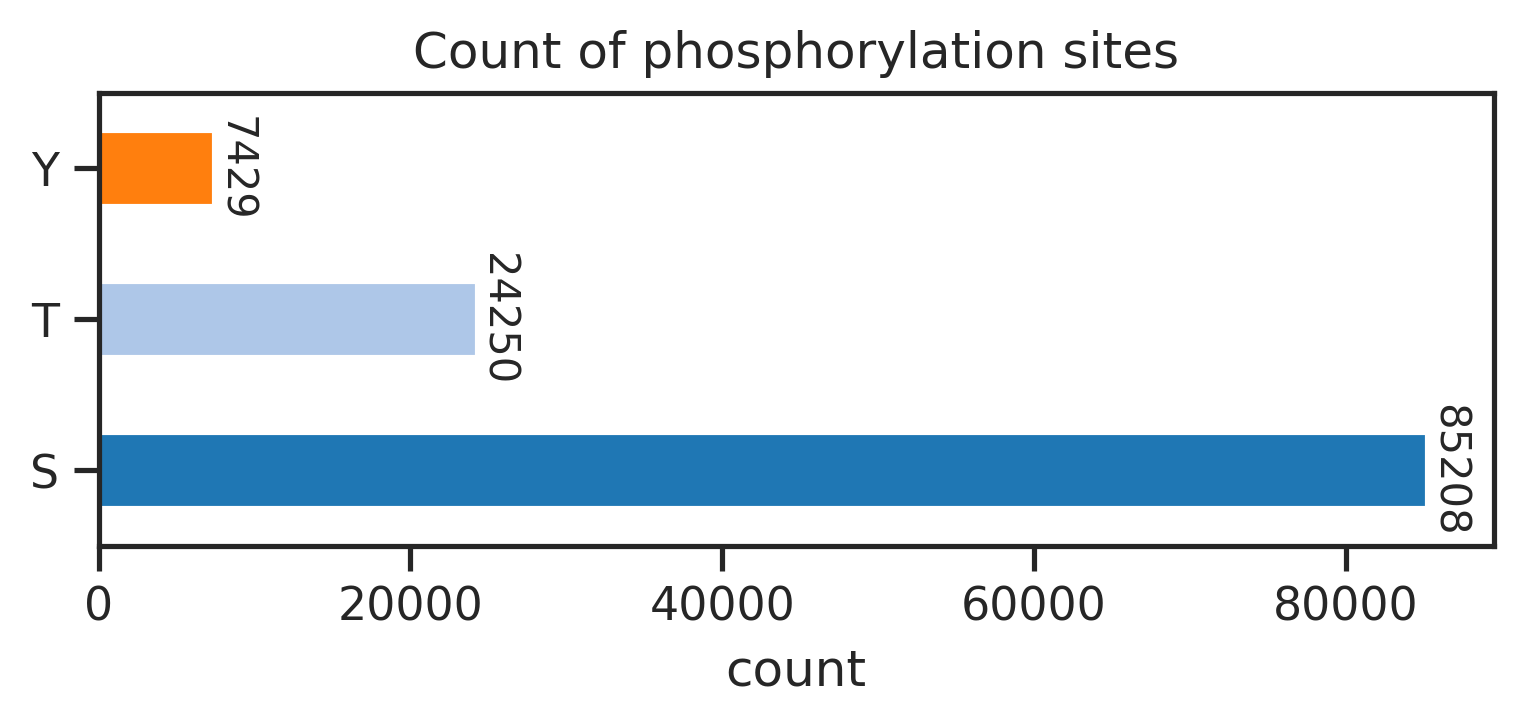

In [ ]:
plt.figure(figsize=(6,2))
plot_count(unique.acceptor.value_counts(),20000)
plt.title('Count of phosphorylation sites')
plt.xlabel('count');

## EDA (optional)

In [ ]:
split = unique.site_seq.apply(list).apply(pd.Series)

In [ ]:
split.columns = [i for i in range(-7,8)]

In [ ]:
split

,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7
0,A,A,A,A,A,A,A,S,G,G,A,G,S,D,N
1,A,A,A,A,A,A,A,S,G,G,G,V,S,P,D
2,A,A,A,A,A,A,A,S,G,V,T,T,G,K,P
3,A,A,A,A,A,A,A,S,Q,Q,G,S,A,K,N
4,A,A,A,A,A,A,A,S,S,P,V,G,V,G,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108328,_,_,_,_,_,_,M,T,Y,A,Y,L,F,K,Y
108329,_,_,_,_,_,_,M,Y,A,P,G,G,A,G,L
108330,_,_,_,_,_,_,M,Y,H,S,L,S,E,T,R
108331,_,_,_,_,_,_,M,Y,P,E,S,T,T,G,S


In [ ]:
for i in range(-7,8):
    temp = pd.DataFrame(split[i].value_counts()).reset_index()
    if i == -7:
        data = temp
    else:
        data = data.merge(temp,'outer')

In [ ]:
data = data.set_index('index')

In [ ]:
aa_order = [i for i in 'PGACSTVILMFYWHKRQNDE']

In [ ]:
data.index[~data.index.isin(aa_order)]

Index(['_'], dtype='object', name='index')

In [ ]:
data = data.reindex(index=aa_order)

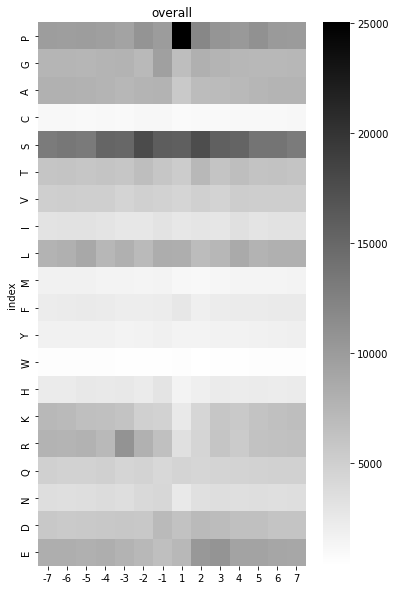

In [ ]:
plot_heatmap(data.drop(columns=[0]),'overall')

In [ ]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_context('notebook')
sns.set_style("ticks")

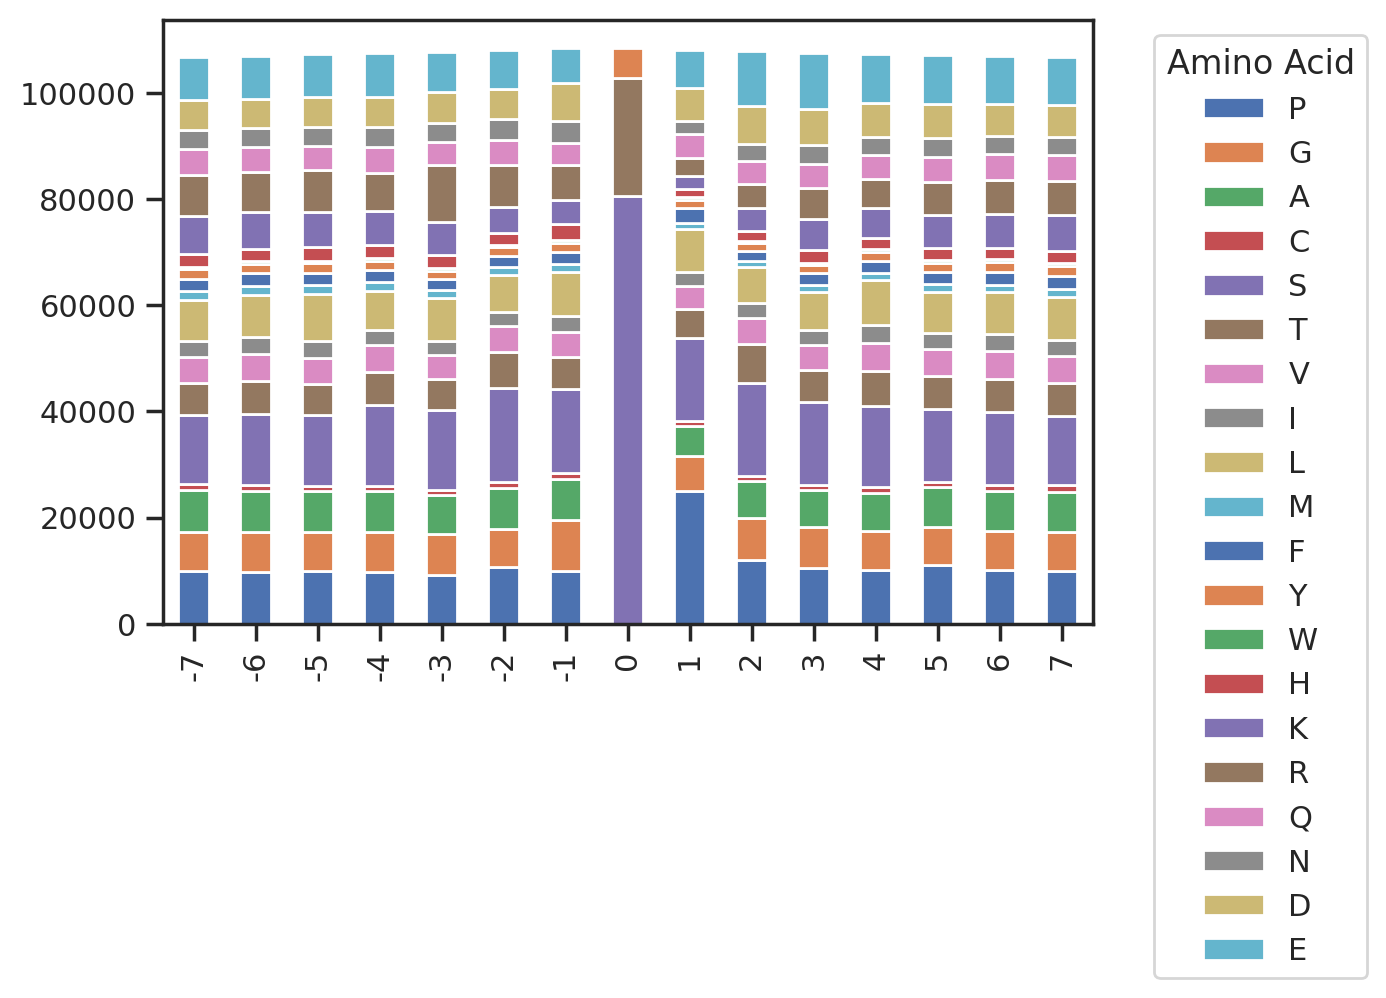

In [ ]:
data.T.plot.bar(stacked=True)
plt.legend(title='Amino Acid', bbox_to_anchor=(1.05, 1), loc='upper left');

## Substrate scoring

In [ ]:
df = unique.copy()

In [ ]:
df

,site_seq,gene_site,gene,num_site,acceptor
0,AAAAAAASGGAGSDN,PBX1_S136,PBX1,1,S
1,AAAAAAASGGGVSPD,PBX2_S146,PBX2,1,S
2,AAAAAAASGVTTGKP,CLASR_S349,CLASR,1,S
3,AAAAAAASQQGSAKN,TBL1R_S119,TBL1R,1,S
4,AAAAAAASSPVGVGQ,SOX3_S249,SOX3,1,S
...,...,...,...,...,...
116882,______MYHSLSETR,TBCD5_Y2,TBCD5,1,Y
116883,______MYPESTTGS,KCAB2_Y2,KCAB2,1,Y
116884,______MYTAIPQSG,CAPG_Y2,CAPG,1,Y
116885,_______SGRGKGGK,H4C1_S1,H4C1,1,S


In [ ]:
# reference for the scoring
ref = Data.get_ks_upper()

In [ ]:
df['site_seq']=df.site_seq.str.replace('U','_')
df['site_seq']=df.site_seq.str.replace('X','_')
# for pspa or combine
# df['short_site_seq'] = df.site_seq.str[-5+7:5+7]

In [ ]:
results = predict_kinase_df(df,ref,'site_seq')

according to the ref 
will calculate position: [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]


100%|██████████| 289/289 [02:28<00:00,  1.94it/s]


## Table important phosphorylation site

Check top sites for AKT1

In [ ]:
idx =results['AKT1'].sort_values(ascending=False).index

df.loc[idx].head()

,site_seq,gene_site,gene,num_site,acceptor,short_site_seq
33804,GSRSRSRSFSSSPSP,ZCH18_S601,ZCH18,1,S,RSRSRSFSSS
84663,RRRRRSRSRSRSRSR,SRSF2_S130,SRSF2,1,S,RRRSRSRSRS
81898,RKRRRTNSSSSSPVV,EMSY_S209,EMSY,1,S,RRRTNSSSSS
109824,VLRQRSRSLSSSGTK,EIF2AK3_S1094|E2AK3_S1094,EIF2AK3|E2AK3,2,S,RQRSRSLSSS
85629,RSRSRSFSSSPSPSP,ZCH18_S603,ZCH18,1,S,RSRSFSSSPS


If a specific substrate protein and kinase are known, check the site on the protein that could be phosphorylated by the kinase.

In [ ]:
def get_substrate(substrate,kinase):
    idx = df[df.gene.str.contains(substrate)].index

    s = results.loc[idx,kinase].sort_values(ascending=False).index
    
    return df.loc[s].head(10)

In [ ]:
get_substrate('TSC','AKT1')

,site_seq,gene_site,gene,num_site,acceptor,short_site_seq
89658,SFRARSTSLNERPKS,TSC2_S939,TSC2,1,S,RARSTSLNER
2149,AFRCRSISVSEHVVR,TSC2_S981,TSC2,1,S,RCRSISVSEH
27444,GARDRVRSMSGGHGL,TSC2_S1130,TSC2,1,S,RDRVRSMSGG
79624,RDRVRSMSGGHGLRV,TSC2_S1132,TSC2,1,S,RVRSMSGGHG
32338,GQRKRLISSVEDFTE,TSC2_S1798,TSC2,1,S,RKRLISSVED
10071,DAYSRSSSVSSQEEK,TSC2_S1338,TSC2,1,S,YSRSSSVSSQ
30976,GLRPRGYTISDSAPS,TSC2_T1462,TSC2,1,T,RPRGYTISDS
33751,GSRGGGGSSSSSSEL,TSC1_S1038,TSC1,1,S,RGGGGSSSSS
24155,EVKARSQSGTLDGES,TSC2_S1420,TSC2,1,S,KARSQSGTLD
48287,KVMARSLSPPPELEE,TSC2_S540,TSC2,1,S,MARSLSPPPE


Locate the specific site and check its score

In [ ]:
# TSC2_S939
results.loc[89658].sort_values(ascending=False).head()

kinase
AKT1      2.931721
AKT3      2.776542
SGK1      2.756602
AKT2      2.576421
P90RSK    2.553318
Name: 89658, dtype: float64

In [ ]:
# GSK3B_S9
results.loc[90437].sort_values(ascending=False).head()

kinase
AKT1      2.875430
SGK1      2.668571
AKT3      2.646435
P90RSK    2.542405
PRKX      2.492733
Name: 90437, dtype: float64

In [ ]:
get_substrate('ERBB','EGFR')

,site_seq,gene_site,gene,num_site,acceptor,short_site_seq
17226,EEDEDEEYEYMNRRR,ERBB3_Y1197,ERBB3,1,Y,DEDEEYEYMN
10653,DEDEEYEYMNRRRRH,ERBB3_Y1199,ERBB3,1,Y,DEEYEYMNRR
40662,IVAENPEYLSEFSLK,ERBB4_Y1284,ERBB4,1,Y,AENPEYLSEF
104190,TPDEDYEYMNRQRDG,ERBB3_Y1262,ERBB3,1,Y,DEDYEYMNRQ
49466,LDIDETEYHADGGKV,ERBB2_Y877,ERBB2,1,Y,IDETEYHADG
72013,PTAENPEYLGLDVPV,ERBB2_Y1248,ERBB2,1,Y,AENPEYLGLD
68650,PPKAEDEYVNEPLYL,ERBB4_Y1202,ERBB4,1,Y,KAEDEYVNEP
27557,GAVENPEYLTPQGGA,ERBB2_Y1196,ERBB2,1,Y,VENPEYLTPQ
34538,GTTPDEDYEYMNRQR,ERBB3_Y1260,ERBB3,1,Y,TPDEDYEYMN
97795,SSLEELGYEYMDVGS,ERBB3_Y1222,ERBB3,1,Y,LEELGYEYMD


In [ ]:
#ERBB3_Y1197
results.loc[17226].sort_values(ascending=False).head()

kinase
EGFR     2.328656
ZAP70    2.272370
SYK      2.271902
LCK      2.228132
PTK2     2.224322
Name: 17226, dtype: float64

In [ ]:
# ERBB2_Y1248
results.loc[72013].sort_values(ascending=False).head()

kinase
EGFR     2.006039
MST1R    1.985345
LCK      1.962595
EPHA8    1.951409
JAK3     1.946792
Name: 72013, dtype: float64

In [ ]:
get_substrate('EGFR','EGFR')

,site_seq,gene_site,gene,num_site,acceptor,short_site_seq
50636,LGAEEKEYHAEGGKV,EGFR_Y869,EGFR,1,Y,AEEKEYHAEG
99227,STAENAEYLRVAPQS,EGFR_Y1197,EGFR,1,Y,AENAEYLRVA
42166,KEILDEAYVMASVDN,EGFR_Y764,EGFR,1,Y,ILDEAYVMAS
40225,ISLDNPDYQQDFFPK,EGFR_Y1172,EGFR,1,Y,LDNPDYQQDF
5241,APSRDPHYQDPHSTA,EGFR_Y1125,EGFR,1,Y,SRDPHYQDPH
15546,DVVDADEYLIPQQGF,EGFR_Y1016,EGFR,1,Y,VDADEYLIPQ
102280,TFLPVPEYINQSVPK,EGFR_Y1092,EGFR,1,Y,LPVPEYINQS
95141,SPTDSNFYRALMDEE,EGFR_Y998,EGFR,1,Y,TDSNFYRALM
57209,MARDPQRYLVIQGDE,EGFR_Y978,EGFR,1,Y,RDPQRYLVIQ
101358,TAVGNPEYLNTVQPT,EGFR_Y1138,EGFR,1,Y,VGNPEYLNTV


In [ ]:
# EGFR_Y1197
results.loc[99227].sort_values(ascending=False)[:5]

kinase
EGFR     2.049314
JAK3     1.966135
CSF1R    1.932014
ERBB4    1.918602
FLT3     1.918283
Name: 99227, dtype: float64

In [ ]:
results.loc[tp53].quantile(0.9).sort_values(ascending=False)[:10]

kinase
ERK2     2.186054
CDK1     2.166878
CK2A1    2.157368
ERK1     2.151973
ATR      2.129316
ATM      2.118869
CK2A2    2.108872
CDK4     2.105550
CDK2     2.088814
CDK5     2.071980
Name: 0.9, dtype: float64

## Plot score distribution in histogram

In [ ]:
palette = get_color_dict(['S','T','Y'],'tab20')

In [ ]:
hist_params = {'element':'poly',
              'edgecolor': None,
              'alpha':0.5,
              'bins':100,
              'kde':True,
              'palette':palette}

In [ ]:
def plot_hist(kinase):
    plt.figure(figsize=(6,2))
    sns.histplot(data=results,x=kinase,hue=unique.acceptor,**hist_params)
    plt.xlabel('')
    plt.title(kinase)

In [ ]:
# def get_genes(kinase,s=None,t=None,y=None,export=True):
#     df2 = df.copy()
#     df2['gene'] = df2.gene.str.split('|')
#     df2[kinase] = results[kinase]
#     print(df2.shape)
#     df3 = df2.explode('gene')
#     print(df3.shape)
#     L = []
#     if y is None:

#         s = df3.query(f'acceptor == "S" & {kinase}>{s}')['gene'].drop_duplicates()

#         t = df3.query(f'acceptor == "T" & {kinase}>{t}')['gene'].drop_duplicates()

#         st = pd.concat([s,t]).drop_duplicates().reset_index()
#         if export:
#             print('exporting csv file for st')
#             st.to_csv(f'{kinase}.csv')
#         return st
#     else:
#         y = df3.query(f'acceptor == "Y" & {kinase}>{y}')['gene'].drop_duplicates()
#         if export:
#             print('exporting csv file for y')
#             y.to_csv(f'{kinase}.csv')
#         return y

In [ ]:
df

,site_seq,gene_site,gene,num_site,acceptor,short_site_seq
0,AAAAAAASGGAGSDN,PBX1_S136,PBX1,1,S,AAAAASGGAG
1,AAAAAAASGGGVSPD,PBX2_S146,PBX2,1,S,AAAAASGGGV
2,AAAAAAASGVTTGKP,CLASR_S349,CLASR,1,S,AAAAASGVTT
3,AAAAAAASQQGSAKN,TBL1R_S119,TBL1R,1,S,AAAAASQQGS
4,AAAAAAASSPVGVGQ,SOX3_S249,SOX3,1,S,AAAAASSPVG
...,...,...,...,...,...,...
116882,______MYHSLSETR,TBCD5_Y2,TBCD5,1,Y,____MYHSLS
116883,______MYPESTTGS,KCAB2_Y2,KCAB2,1,Y,____MYPEST
116884,______MYTAIPQSG,CAPG_Y2,CAPG,1,Y,____MYTAIP
116885,_______SGRGKGGK,H4C1_S1,H4C1,1,S,_____SGRGK


In [ ]:
def get_genes(kinase,s=None,t=None,y=None,export=True):
    df2 = df[['gene','acceptor']].copy()
    df2['gene'] = df2.gene.str.split('|')
    df2[kinase] = results[kinase]
    print(df2.shape)
    df2 = df2.explode('gene')
    print(df2.shape)
    L = []
    if s is not None:
        s = df2.query(f'acceptor == "S" & {kinase}>{s}')['gene'].drop_duplicates()
        L.append(s)
    if t is not None:
        t = df2.query(f'acceptor == "T" & {kinase}>{t}')['gene'].drop_duplicates()
        L.append(t)
    if y is not None:
        y = df2.query(f'acceptor == "Y" & {kinase}>{y}')['gene'].drop_duplicates()
        L.append(y)
        
    sty = pd.concat(L).drop_duplicates().reset_index()
    
    if export:
        print('exporting csv file for st')
        sty.to_csv(f'{kinase}.csv')
        
    return sty


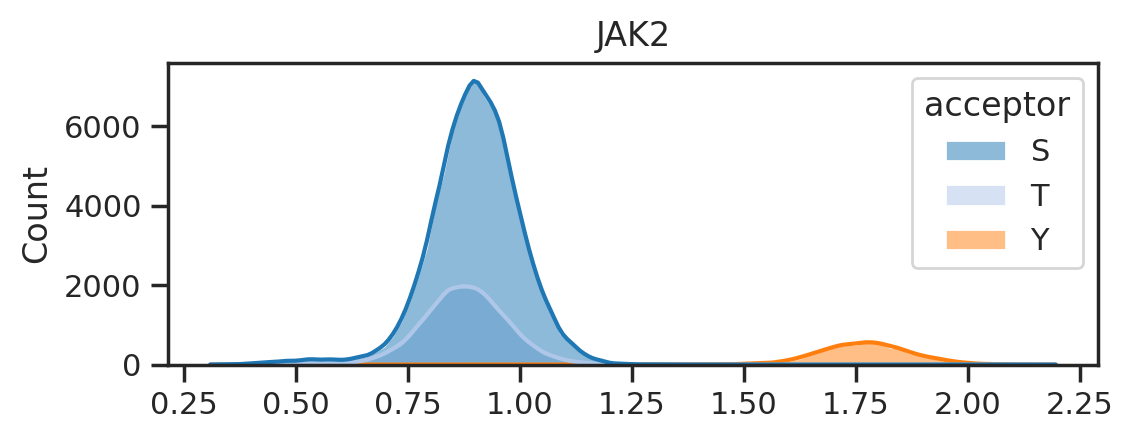

In [ ]:
plot_hist('JAK2') # Y: 2.0

In [ ]:
_ = get_genes('JAK2',y=2.0)

(116887, 3)
(123515, 3)
exporting csv file for st


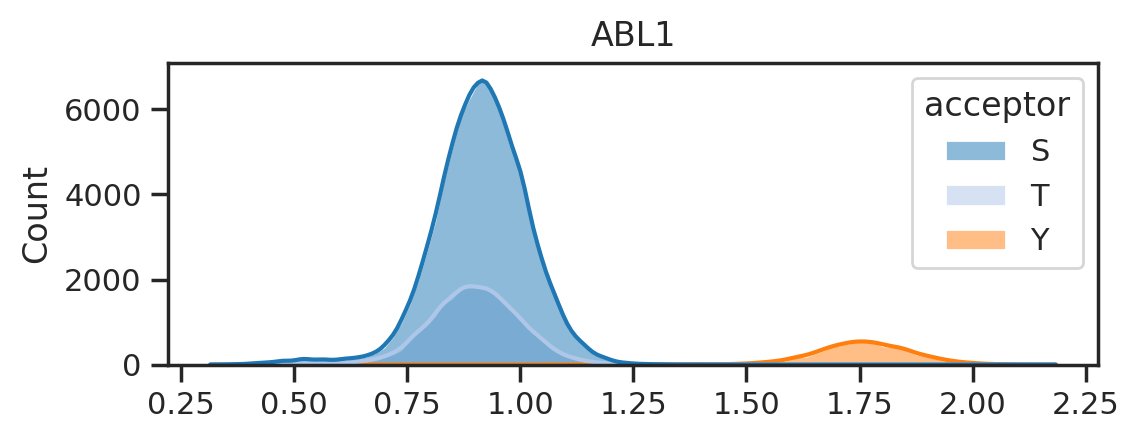

In [ ]:
plot_hist('ABL1') # Y: 2.0

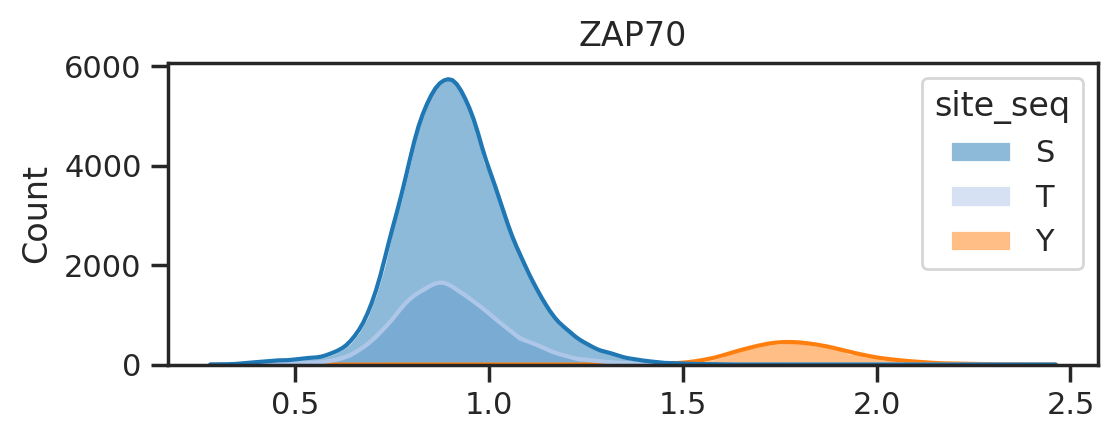

In [ ]:
plot_hist('ZAP70') # Y: 2.1

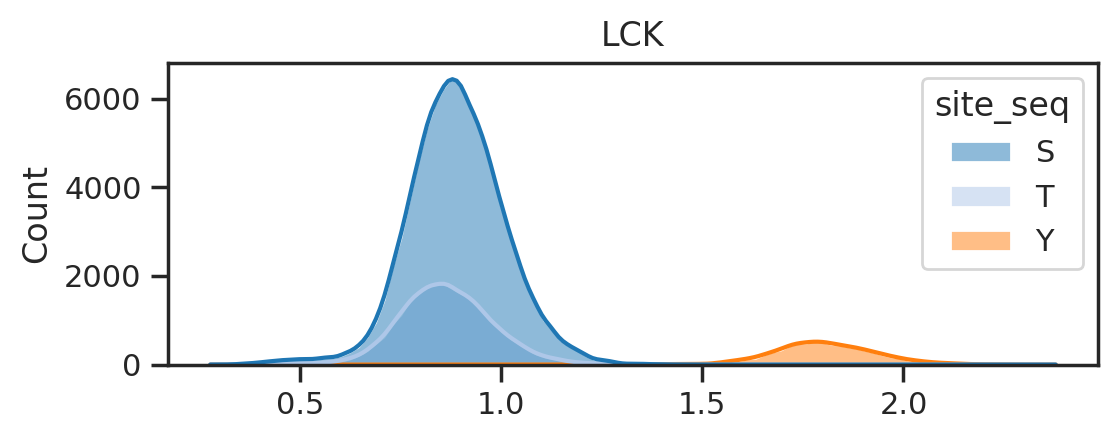

In [ ]:
plot_hist('LCK') # Y: 2.1

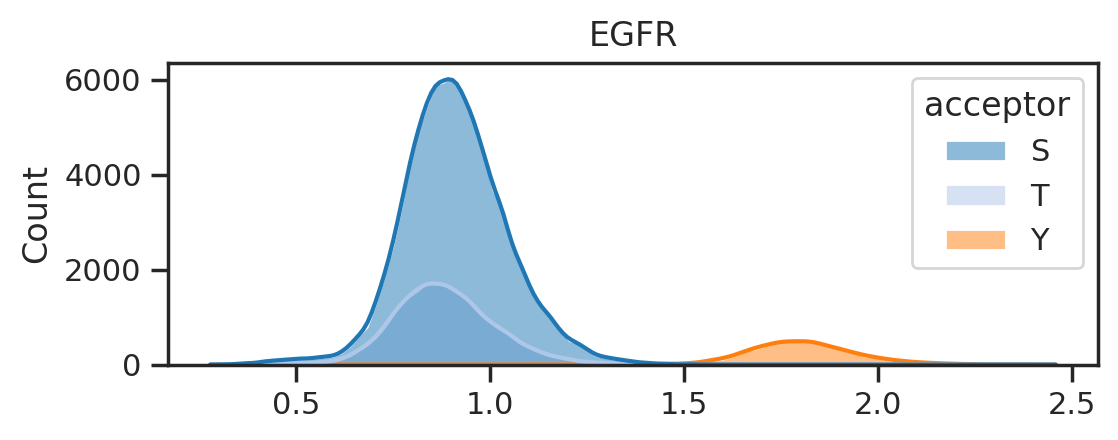

In [ ]:
plot_hist('EGFR') # Y: 2.1

In [ ]:
y = get_genes('EGFR',y=2.0)

(116887, 3)
(123515, 3)
exporting csv file for st


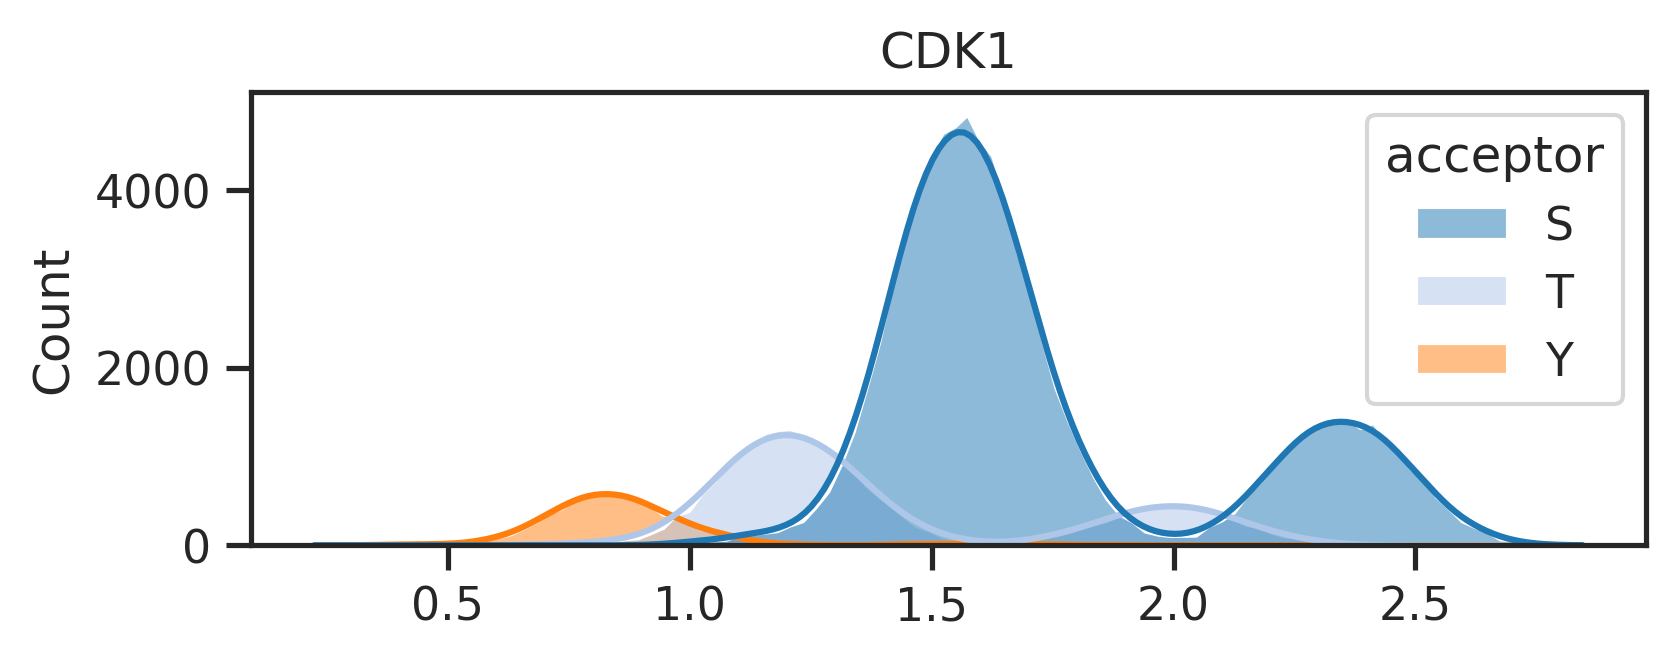

In [ ]:
plot_hist('CDK1') # s: 2.0, t: 1.65
# plt.axvline(1.65)

In [ ]:
y = get_genes('CDK1',s=2.0,t=1.65)

(116887, 3)
(123515, 3)
exporting csv file for st


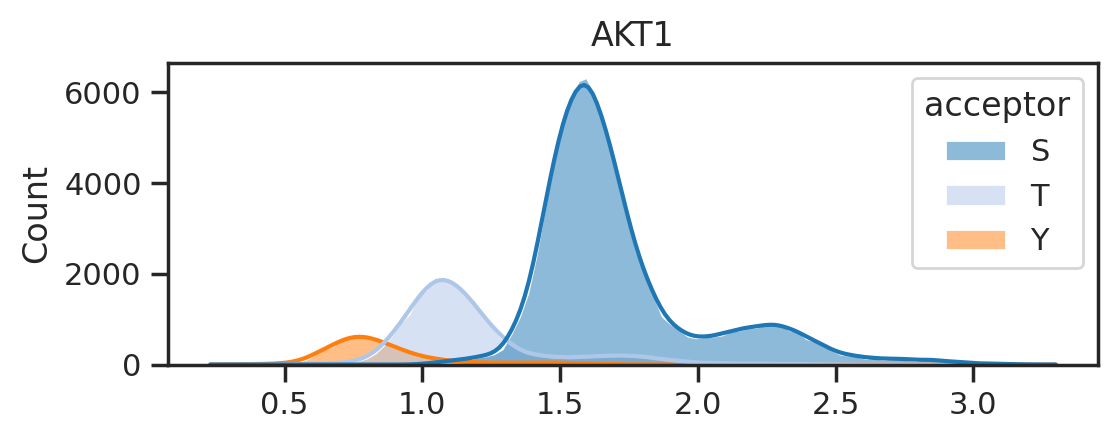

In [ ]:
plot_hist('AKT1') # S: 2.55, T: 1.6

In [ ]:
y = get_genes('AKT1',s=2.55,t=1.6)

(116887, 7)
(123515, 7)
exporting csv file for st


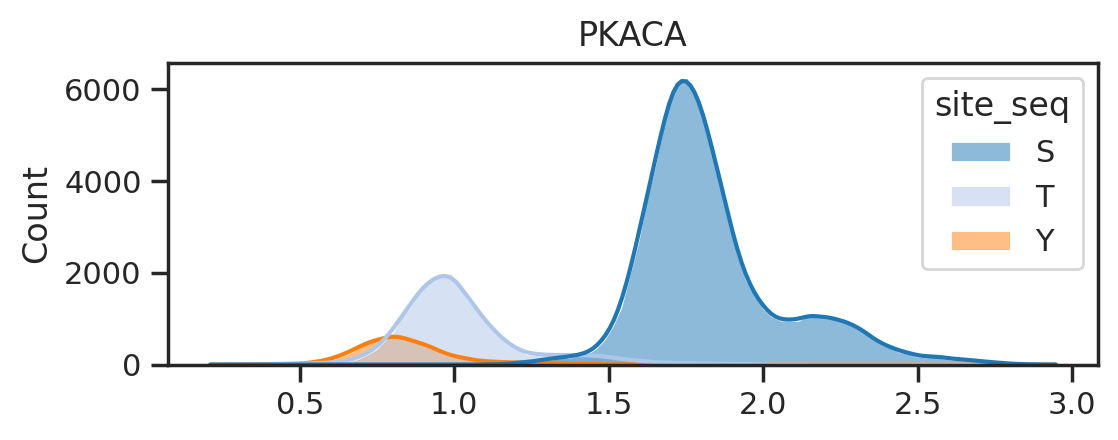

In [ ]:
plot_hist('PKACA') # S: 2.5, T: 1.5

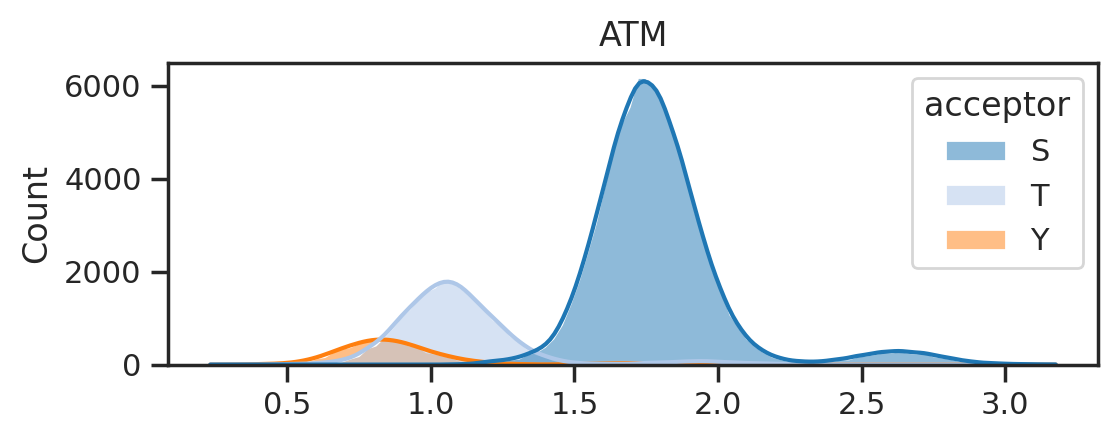

In [ ]:
plot_hist('ATM') # S: 2.3, T: 1.55

In [ ]:
st = get_genes('ATM',s=2.3,t=1.55)

(116887, 9)
(123515, 9)
exporting csv file for st
